# **4101553 Métodos Numéricos aplicados a la Ingenieria Civil**

Departamento de Ingeniería Civil

Universidad Nacional de Colombia

Sede Manizales

**Docente:** Juan Nicolás Ramírez Giraldo ([jnramirezg@unal.edu.co](mailto:jnramirezg@unal.edu.co))


"*Cum cogitaveris quot te antecedant, respice quot sequantur*"

**Séneca**


[Repositorio de la asignatura](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/)


# **Unidad 1: Sistemas de ecuaciones lineales**
## **Métodos Iterativos**
1. Método de Jacobi
2. Método de Gauss-Seidel

### **Método de Jacobi**

#### **1. Construcción del método**

La propuesta del método de Jacobi busca despejar de cada ecuación una de las incógnitas, de tal manera que, se puedan evaluar iterativamente las demás. Más adelante se discutirán los cuidados numéricos que se deben considerar para garantizar la convergencia.


Para la construcción del método se usa inicialmente un sistema de 3x3 simbólico:

Dado la matriz de coeficientes constantes:
$\underline{\underline{A}}=\displaystyle \left[\begin{matrix}i_{0} & i_{1} & i_{2}\\j_{0} & j_{1} & j_{2}\\k_{0} & k_{1} & k_{2}\end{matrix}\right]$

Y el vector de constantes:
$\underline{B}=\displaystyle \left[\begin{matrix}b_0\\b_1\\b_2\end{matrix}\right]$

Se busca hallar el vector de soluciones $\underline{X}$ de la expresión: $\underline{\underline{A}}.\underline{X}=\underline{B}$

En este caso, se define para efectos de programación en Python:
$\underline{X}=\displaystyle \left[\begin{matrix}x_0\\x_1\\x_2\end{matrix}\right]$



In [1]:
# Importación de liberías.
import sympy as sp

In [2]:
# Incógnitas simbólicas.
x0, x1, x2 = sp.symbols('x_0 x_1 x_2')

In [3]:
# Constantes simbólicas.
b0, b1, b2 = sp.symbols('b_0 b_1 b_2')

In [4]:
# Coeficientes constantes simbólicos.
i0, i1, i2 = sp.symbols('i_0 i_1 i_2')  # Se asocian a la primera ec.
j0, j1, j2 = sp.symbols('j_0 j_1 j_2')  # Se asocian a la segunda ec.
k0, k1, k2 = sp.symbols('k_0 k_1 k_2')  # Se asocian a la tercera ec.

In [5]:
# Definición de la matriz de coeficientes constantes.
A = sp.Matrix([[i0, i1, i2],
               [j0, j1, j2],
               [k0, k1, k2]])

In [6]:
A

Matrix([
[i_0, i_1, i_2],
[j_0, j_1, j_2],
[k_0, k_1, k_2]])

In [7]:
X = sp.Matrix([x0, x1, x2])

In [8]:
X

Matrix([
[x_0],
[x_1],
[x_2]])

In [9]:
B = sp.Matrix([b0, b1, b2])

In [10]:
B

Matrix([
[b_0],
[b_1],
[b_2]])

In [11]:
P = A*X - B  # Esto es igual a 0 porque AX = B

In [12]:
P

Matrix([
[-b_0 + i_0*x_0 + i_1*x_1 + i_2*x_2],
[-b_1 + j_0*x_0 + j_1*x_1 + j_2*x_2],
[-b_2 + k_0*x_0 + k_1*x_1 + k_2*x_2]])

Por lo que, el sistema queda de la siguiente manera:

$\displaystyle \left[\begin{matrix}- b_{0} + i_{0} x_{0} + i_{1} x_{1} + i_{2} x_{2}\\- b_{1} + j_{0} x_{0} + j_{1} x_{1} + j_{2} x_{2}\\- b_{2} + k_{0} x_{0} + k_{1} x_{1} + k_{2} x_{2}\end{matrix}\right] = \displaystyle \left[\begin{matrix}0\\0\\0\end{matrix}\right]$

Se despeja $x_0$, $x_1$ y $x_2$ de la primera, segunda y tercera ecuación, respectivamente. 

In [13]:
# Este código por el momento NO es necesario estudiarlo.
e0 = sp.solve(P[0],x0)[0]
e1 = sp.solve(P[1],x1)[0]
e2 = sp.solve(P[2],x2)[0]

In [14]:
# De la ecuación 1, se despeja x0
e0

(b_0 - i_1*x_1 - i_2*x_2)/i_0

In [15]:
# De la ecuación 2, se despeja x1
e1

(b_1 - j_0*x_0 - j_2*x_2)/j_1

In [16]:
# De la ecuación 3, se despeja x2
e2

(b_2 - k_0*x_0 - k_1*x_1)/k_2

Es decir,

$x_0 =\displaystyle \frac{b_{0} - i_{1} x_{1} - i_{2} x_{2}}{i_{0}}$

$x_1 =\displaystyle \frac{b_{1} - j_{0} x_{0} - j_{2} x_{2}}{j_{1}}$

$x_2 =\displaystyle \frac{b_{2} - k_{0} x_{0} - k_{1} x_{1}}{k_{2}}$

Luego, se asume para la iteración 0 que:

$\displaystyle \left[\begin{matrix}x_{0}^{(m)}\\x_{1}^{(m)}\\x_{2}^{(m)}\end{matrix}\right]$ = $\displaystyle \left[\begin{matrix}0\\0\\0\end{matrix}\right]$



Con las ecuaciones organizadas así:

$\displaystyle \left[\begin{matrix}x_{0}^{(m+1)}\\x_{1}^{(m+1)}\\x_{2}^{(m+1)}\end{matrix}\right]$ = 
$\displaystyle \left[\begin{matrix}\frac{b_{0} - i_{1} x_{1}^{(m)} - i_{2} x_{2}^{(m)}}{i_{0}}\\\frac{b_{1} - j_{0} x_{0}^{(m)} - j_{2} x_{2}^{(m)}}{j_{1}}\\\frac{b_{2} - k_{0} x_{0}^{(m)} - k_{1} x_{1}^{(m)}}{k_{2}}\end{matrix}\right]$


Se obtienen después de la primera iteración que $x_{0}$, $x_{1}$ y $x_{2}$ toman nuevos valores, es decir, los valores que se usarán en la iteración 1. Así, sucesivamente ¿hasta qué iteración?

Es allí, donde se definen unos criterios de error, los cuales se mostrarán más adelante.

##### **1.1. Generalización del método a $mxm$**

Resulta altamente complejo realizar despejes particulares para cada sistema de ecuaciones, por lo que, se busca una estructura matricial simple que llegue a la forma general $mxm$:

De caso $3x3$ sabemos que la ecuación del método es:

$\displaystyle \left[\begin{matrix}x_{0}^{(m+1)}\\x_{1}^{(m+1)}\\x_{2}^{(m+1)}\end{matrix}\right]$ = 
$\displaystyle \left[\begin{matrix}\frac{b_{0} - i_{1} x_{1}^{(m)} - i_{2} x_{2}^{(m)}}{i_{0}}\\\frac{b_{1} - j_{0} x_{0}^{(m)} - j_{2} x_{2}^{(m)}}{j_{1}}\\\frac{b_{2} - k_{0} x_{0}^{(m)} - k_{1} x_{1}^{(m)}}{k_{2}}\end{matrix}\right]$

Por lo tanto, a partir de la ec(0) se busca construir una forma matricial general que no sea particular para $m=3$

In [17]:
# Se construye un vector con los resultados a los que queremos llegar.
ec0 = sp.Matrix([e0, e1, e2])
ec1 = sp.Matrix([e0, e1, e2]) # Se crea una copia para realizar operaciones.

In [18]:
ec0

Matrix([
[(b_0 - i_1*x_1 - i_2*x_2)/i_0],
[(b_1 - j_0*x_0 - j_2*x_2)/j_1],
[(b_2 - k_0*x_0 - k_1*x_1)/k_2]])

¿Cómo se organiza?

$\displaystyle \left[\begin{matrix}\frac{b_{0} - i_{1} x_{1} - i_{2} x_{2}}{i_{0}}\\\frac{b_{1} - j_{0} x_{0} - j_{2} x_{2}}{j_{1}}\\\frac{b_{2} - k_{0} x_{0} - k_{1} x_{1}}{k_{2}}\end{matrix}\right]$  ec(0)

La propuesta es eliminar los denominadores de cada fila, de tal manera que, se multiplica la fila 0 por $i_0$, la fila 1 por $j_1$ y la fila 2 por $k_2$.

Luego, esto deberá ser compensado multiplicando por $1/i_0$, $1/j_1$ y $1/k_2$, correpondientemente, en un paso siguiente a fin de consevar la igualdad.

In [19]:
ec1[0] = ec1[0]*(i0)
ec1[1] = ec1[1]*(j1)
ec1[2] = ec1[2]*(k2)

In [20]:
ec1 # Ecuación 1

Matrix([
[b_0 - i_1*x_1 - i_2*x_2],
[b_1 - j_0*x_0 - j_2*x_2],
[b_2 - k_0*x_0 - k_1*x_1]])

Recordando que:

La matriz de coeficientes constantes está definida por:
$\underline{\underline{A}}=\displaystyle \left[\begin{matrix}i_{0} & i_{1} & i_{2}\\j_{0} & j_{1} & j_{2}\\k_{0} & k_{1} & k_{2}\end{matrix}\right]$

El vector de constantes por:
$\underline{B}=\displaystyle \left[\begin{matrix}b_0\\b_1\\b_2\end{matrix}\right]$

Y el vector de incógnitas por:
$\underline{X}=\displaystyle \left[\begin{matrix}x_0\\x_1\\x_2\end{matrix}\right]$

¿Qué pasa si se realiza esta operación?

$\underline{B} - \underline{\underline{A}}.\underline{X}$

In [21]:
ec2 = B - A*X  # Ecuación 2

¿Qué similitudes tienen la ecuación 1 y la ecuación 2 ($\underline{B} - \underline{\underline{A}}.\underline{X}$)?

$\displaystyle \left[\begin{matrix}b_{0} - i_{1} x_{1} - i_{2} x_{2}\\b_{1} - j_{0} x_{0} - j_{2} x_{2}\\b_{2} - k_{0} x_{0} - k_{1} x_{1}\end{matrix}\right]$ ec(1)

$\displaystyle \left[\begin{matrix}b_{0} - i_{0} x_{0} - i_{1} x_{1} - i_{2} x_{2}\\b_{1} - j_{0} x_{0} - j_{1} x_{1} - j_{2} x_{2}\\b_{2} - k_{0} x_{0} - k_{1} x_{1} - k_{2} x_{2}\end{matrix}\right]$ ec(2)


Aplicamos la resta de las ecuaciones y revisamos qué elementos quedan:

In [22]:
ec2-ec1

Matrix([
[-i_0*x_0],
[-j_1*x_1],
[-k_2*x_2]])

¿Qué elementos no son comunes?

$\displaystyle \left[\begin{matrix}
b_{0} - \underline{i_{0} x_{0}} - i_{1} x_{1} - i_{2} x_{2}\\
b_{1} - j_{0} x_{0} - \underline{j_{1} x_{1}} - j_{2} x_{2}\\
b_{2} - k_{0} x_{0} - k_{1} x_{1} - \underline{k_{2} x_{2}}
\end{matrix}\right]$

Claramente, corresponden a los elementos de la diagonal de la matriz de coeficientes constantes.

Por lo tanto, la propuesta consiste en crear una matriz $\underline{\underline{T}}$ con los elementos de $\underline{\underline{A}}$, pero sin los elementos de la diagonal.

In [23]:
# Se crea una matriz T con los mismos coeficientes constantes,
# pero sin la diagonal.
T = sp.Matrix([[ 0, i1, i2],
               [j0,  0, j2],
               [k0, k1,  0]])

In [24]:
T

Matrix([
[  0, i_1, i_2],
[j_0,   0, j_2],
[k_0, k_1,   0]])

Ahora, en vez de usar:

$\underline{B} - \underline{\underline{A}}.\underline{X}$  ec(2)

Se usa:
$\underline{B} - \underline{\underline{T}}.\underline{X}$  ec(3)

In [25]:
ec3 = B - T*X

In [26]:
ec3

Matrix([
[b_0 - i_1*x_1 - i_2*x_2],
[b_1 - j_0*x_0 - j_2*x_2],
[b_2 - k_0*x_0 - k_1*x_1]])

Se verifica que la ecuación 3 con la nueva propuesta sea igual a la ecuación 1:

In [27]:
ec3-ec1

Matrix([
[0],
[0],
[0]])

Ahora sí son iguales. Solo falta multiplicar cada fila por $1/i_0$, $1/j_1$ y $1/k_2$, correpondientemente, para llegar a la ec(0).

¿Cómo se hace esto a partir de una operación matricial simple?

In [28]:
# Se crea una matriz D con la diagonal de A.
D = sp.Matrix([
               [i0,  0,  0],
               [ 0, j1,  0],
               [ 0,  0, k2],
                           ])

In [29]:
D

Matrix([
[i_0,   0,   0],
[  0, j_1,   0],
[  0,   0, k_2]])

Nótese que $\underline{\underline{A}}=\underline{\underline{D}}+\underline{\underline{T}}$, es decir, una forma de descomponer la matriz.

In [30]:
# Se comprueba lo anterior.
A-(D+T)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Luego, $\underline{\underline{D}}^{-1}$ es:


In [31]:
D**-1

Matrix([
[1/i_0,     0,     0],
[    0, 1/j_1,     0],
[    0,     0, 1/k_2]])

Que tiene un muy bajo costo computacional, e incluso no es necesario realizar la operación con el concepto de inversa, sino con una rutina particular.

Recordando que, se busca llegar a la ec(0):



$\displaystyle \left[\begin{matrix}\frac{b_{0} - i_{1} x_{1} - i_{2} x_{2}}{i_{0}}\\\frac{b_{1} - j_{0} x_{0} - j_{2} x_{2}}{j_{1}}\\\frac{b_{2} - k_{0} x_{0} - k_{1} x_{1}}{k_{2}}\end{matrix}\right]$

Se verifica si con esta expresión se llega a la ecuación 0:

$\underline{\underline{D}}^{-1}(\underline{B}-\underline{\underline{T}}.\underline{X})$

In [32]:
# Se verifica lo anterior.
ec4 = D**-1*(B - T*X)

In [33]:
ec4

Matrix([
[(b_0 - i_1*x_1 - i_2*x_2)/i_0],
[(b_1 - j_0*x_0 - j_2*x_2)/j_1],
[(b_2 - k_0*x_0 - k_1*x_1)/k_2]])

$\displaystyle \left[\begin{matrix}\frac{b_{0} - i_{1} x_{1} - i_{2} x_{2}}{i_{0}}\\\frac{b_{1} - j_{0} x_{0} - j_{2} x_{2}}{j_{1}}\\\frac{b_{2} - k_{0} x_{0} - k_{1} x_{1}}{k_{2}}\end{matrix}\right]$ ec(4)

In [34]:
# Se verifica si ec(4)=ec(0)
ec4-ec0

Matrix([
[0],
[0],
[0]])

Por lo tanto,

$\displaystyle \left[\begin{matrix}x_{0}^{(m+1)}\\x_{1}^{(m+1)}\\x_{2}^{(m+1)}\end{matrix}\right]=
\displaystyle \left[\begin{matrix}\frac{1}{i_{0}} & 0 & 0\\0 & \frac{1}{j_{1}} & 0\\0 & 0 & \frac{1}{k_{2}}\end{matrix}\right]\left(\displaystyle \left[\begin{matrix}b_{0}\\b_{1}\\b_{2}\end{matrix}\right] - \displaystyle \left[\begin{matrix}0 & i_{1} & i_{2}\\j_{0} & 0 & j_{2}\\k_{0} & k_{1} & 0\end{matrix}\right]\displaystyle \left[\begin{matrix}x_0^{(m)}\\x_1^{(m)}\\x_2^{(m)}\end{matrix}\right]\right)$ 

Con lo que se llega a la expresión buscada:

$\displaystyle \left[\begin{matrix}x_{0}^{(m+1)}\\x_{1}^{(m+1)}\\x_{2}^{(m+1)}\end{matrix}\right]$ = 
$\displaystyle \left[\begin{matrix}\frac{b_{0} - i_{1} x_{1}^{(m)} - i_{2} x_{2}^{(m)}}{i_{0}}\\\frac{b_{1} - j_{0} x_{0}^{(m)} - j_{2} x_{2}^{(m)}}{j_{1}}\\\frac{b_{2} - k_{0} x_{0}^{(m)} - k_{1} x_{1}^{(m)}}{k_{2}}\end{matrix}\right]$

La expresión general del método es:

$\underline{X}^{m+1}=\underline{\underline{D}}^{-1}(\underline{B}-\underline{\underline{T}}.\underline{X}^{m})$

en donde,
$\underline{\underline{A}}=\underline{\underline{D}}+\underline{\underline{T}}$

$\underline{\underline{D}}$ es una matriz diagonal con los elementos de la diagonal de la matriz $\underline{\underline{A}}$.




#### **1.2. Solución numérica con lista de listas**

Para efectos de aprendizaje profundo de los procesos, se desarrollará su aplicación a partir de lista de listas y sin usar ningún módulo de Python.

Inicialmente se desarrollará para un sistema de 3x3, y luego se ampliará a cualquier sistema.

In [35]:
# Se define la matriz coeficientes constantes A como una lista de listas.
A = [[ 3, -1, -1],
     [-1,  3,  1],
     [ 2,  1,  4]]
# Se define el vector B como una lista.
B = [1, 3, 7]

De acuerdo, con la formulación general, se debe descomponer la matriz $\underline{\underline{A}}$ en $\underline{\underline{D}}$ y $\underline{\underline{T}}$.


**Matriz $\underline{\underline{D}}$**

In [36]:
# Matriz D, con los elementos de la diagonal.

# Se define el espacio de memoria.
D = [[0, 0, 0], [0, 0, 0], [0, 0, 0],]  # Para una matriz de 3x3.
# De forma específica se deben asignar los valores así:
# Fila 0
D[0][0] = A[0][0]
D[0][1] = 0
D[0][2] = 0
# Fila 1
D[1][0] = 0
D[1][1] = A[1][1]
D[1][2] = 0
# Fila 2
D[2][0] = 0
D[2][1] = 0
D[2][2] = A[2][2]

In [37]:
D

[[3, 0, 0], [0, 3, 0], [0, 0, 4]]

Luego, este proceso no es tan eficiente. Por lo que es adecuado ponerlo dentro de un ciclo.

Se observa que, cuando en $\underline{\underline{D}}$ ocurre que $i=j$, entonces se llama el corresponiente en $\underline{\underline{A}}$, y de lo contrario, si $i\neq j$, se pone 0.

Si $i=j$:

$d_{ij} = a_{ij}$

de lo contrario, si $i\neq j$:

$d_{ij} = 0$




In [38]:
# Se define nuevamente el espacio de memoria.
D = [[0, 0, 0], [0, 0, 0], [0, 0, 0],]  # Para una matriz de 3x3.

In [39]:
for i in range(3):      # Recorre 3 filas.
    for j in range(3):  # Recorre 3 columnas.
        if i==j:        # Condición 1.
            D[i][j] = A[i][j]
        else:           # Condición 2.
            D[i][j] = 0            

In [40]:
D

[[3, 0, 0], [0, 3, 0], [0, 0, 4]]

De forma más general, si se tiene la matriz A de orden n (cuadrada), se podría crear automáticamente la matriz diagonal correspondiente:

In [41]:
n = len(A)     # El número de filas de A.
m = len(A[0])  # El número de columnas de A.

# Se crea una matriz de ceros de tamaño n.
# Se supone que m=n, pero para evitar controlar errores en este paso
# se crea de manera general.
D = []
for i in range(n):
    D += [[]]
    for j in range(m):
        D[i] += [0]

In [42]:
D

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [43]:
for i in range(n):      # Recorre n filas.
    for j in range(m):  # Recorre m columnas.
        if i==j:        # Condición 1.
            D[i][j] = A[i][j]
        else:           # Condición 2.
            D[i][j] = 0

In [44]:
D

[[3, 0, 0], [0, 3, 0], [0, 0, 4]]

Ya generalizado y sistematizado el proceso, se genera una función:

In [45]:
def matriz_D(A):
    '''
        Función a la que se le ingresa una matriz definida como una lista
        de listas, y devuelve una matriz del mismo tamaño, pero únicamente
        con los elementos de la diagonal.
    '''
    n = len(A)     # El número de filas de A.
    m = len(A[0])  # El número de columnas de A.

    # Se crea una matriz de ceros de tamaño n.
    # Se supone que m=n, pero para evitar controlar errores en este paso
    # se crea de manera general.
    D = []
    for i in range(n):
        D += [[]]
        for j in range(m):
            D[i] += [0]

    for i in range(n):      # Recorre n filas.
        for j in range(m):  # Recorre m columnas.
            if i==j:        # Condición 1.
                D[i][j] = A[i][j]
            #else:           # Condición 2.
            #    D[i][j] = 0
    return D

In [46]:
# Se prueba su funcionamiento.
matriz_D(A)

[[3, 0, 0], [0, 3, 0], [0, 0, 4]]

In [47]:
# Se define una matriz J de tamaño 3x2.
J = [[1, 2],
     [3, 4],
     [5, 6]]

In [48]:
matriz_D(J)

[[1, 0], [0, 4], [0, 0]]

In [49]:
# Se define una matriz K de tamaño 2x3.
K = [[1, 2, 3],
     [4, 5, 6]]

In [50]:
matriz_D(K)

[[1, 0, 0], [0, 5, 0]]

**Matriz $\underline{\underline{T}}$**

Matriz $\underline{\underline{T}}$, con los elementos que no son de la diagonal.

#### **Síntesis del método**
De forma análoga a $\underline{\underline{D}}$, se observa que, cuando en $\underline{\underline{T}}$ ocurre que $i\neq j$, entonces se llama el corresponiente en $\underline{\underline{A}}$, y de lo contrario, si $i=j$, se pone 0.

Si $i\neq j$:

$d_{ij} = a_{ij}$

de lo contrario, si $i=j$:

$d_{ij} = 0$

Ya generalizado y sistematizado el proceso, se genera una función:

In [51]:
def matriz_T(A):
    '''
        Función a la que se le ingresa una matriz definida como una lista
        de listas, y devuelve una matriz del mismo tamaño y con los mismos
        elementos, pero sin los elementos de la diagonal.
    '''
    n = len(A)     # El número de filas de A.
    m = len(A[0])  # El número de columnas de A.

    # Se crea una matriz de ceros de tamaño n.
    # Se supone que m=n, pero para evitar controlar errores en este paso
    # se crea de manera general.
    T = []
    for i in range(n):
        T += [[]]
        for j in range(m):
            T[i] += [0]

    for i in range(n):      # Recorre n filas.
        for j in range(m):  # Recorre m columnas.
            if i!=j:        # Condición 1, ÚNICO CAMBIO: en vez de ==, !=.
                T[i][j] = A[i][j]
            #else:           # Condición 2.
            #    T[i][j] = 0
    return T

Se prueba con las matrices $\underline{\underline{A}}$, $\underline{\underline{J}}$ y $\underline{\underline{K}}$; previamente definidas.


In [52]:
matriz_T(A)

[[0, -1, -1], [-1, 0, 1], [2, 1, 0]]

In [53]:
matriz_T(J)    

[[0, 2], [3, 0], [5, 6]]

In [54]:
matriz_T(K)

[[0, 2, 3], [4, 0, 6]]

Luego, la creación de la matriz de ceros se puede automatizar en una función:

In [55]:
def matriz_ceros(m, n):
    '''
        Se crea una matriz de ceros de tamaño mxn definida 
        como una lista de listas.
    '''
    C = []
    for i in range(n):
        C += [[]]
        for j in range(m):
            C[i] += [0]
    return C

In [56]:
matriz_ceros(4, 4)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

Adicionalmente, se requiere la inversa de la matriz diagonal $\underline{\underline{D}}$, la cual se puede obtener con una rutina sencilla, así:


In [57]:
def matriz_Dinv(D):
    '''
        Función que se le ingresa una matriz definida como una lista de litas, y retorna
        la matriz inversa de la matriz diagonal correspondiente.
    '''
    n = len(D)     # El número de filas de D.
    m = len(D[0])  # El número de columnas de D.
    
    # Se crea el espacio de memoria adecuado con ceros.
    Dinv = matriz_ceros(m, n) # Esta función debe estar en el mismo programa que la función prin.

    for i in range(n):      # Recorre n filas.
        for j in range(m):  # Recorre m columnas.
            if i==j:        # Condición ÚNICA.
                Dinv[i][j] = 1/D[i][j]
    return Dinv

In [58]:
matriz_Dinv(D)

[[0.3333333333333333, 0, 0], [0, 0.3333333333333333, 0], [0, 0, 0.25]]

Insistiendo en el uso de listas y no de módulos, se debe definir la multiplicación de una matriz de orden $nxn$ por un vector $nx1$, tal como se evidencia a continuación:

$\displaystyle \left[\begin{matrix}x_{0}^{(m+1)}\\x_{1}^{(m+1)}\\x_{2}^{(m+1)}\end{matrix}\right]$=
$\displaystyle \left[\begin{matrix}\frac{1}{i_{0}} & 0 & 0\\0 & \frac{1}{j_{1}} & 0\\0 & 0 & \frac{1}{k_{2}}\end{matrix}\right]\left(\displaystyle \left[\begin{matrix}b_{0}\\b_{1}\\b_{2}\end{matrix}\right] - \displaystyle \left[\begin{matrix}0 & i_{1} & i_{2}\\j_{0} & 0 & j_{2}\\k_{0} & k_{1} & 0\end{matrix}\right]\displaystyle \left[\begin{matrix}x_0^{(m)}\\x_1^{(m)}\\x_2^{(m)}\end{matrix}\right]\right)$ 

$\underline{X}^{m+1}=\underline{\underline{D}}^{-1}(\underline{B}-\underline{\underline{T}}.\underline{X}^{m})$

Creación del producto de una matriz por un vector conforme:

In [59]:
A # Matriz previamente creada.

[[3, -1, -1], [-1, 3, 1], [2, 1, 4]]

In [60]:
B  # Vector previamente creado.

[1, 3, 7]

$\underline{\underline{A}}*\underline{B}$ en el contexto matricial debe arrojar un vector del mismo tamaño que $\underline{B}$.

In [61]:
# Se crea un vector del mismo tamaño que B, lleno de ceros.
matriz_ceros(len(B), 1)

[[0, 0, 0]]

In [62]:
# Se le agrega el indexado cero para que sea una lista, y no una lista de listas.
Mmul = matriz_ceros(len(B), 1)[0]  

In [63]:
Mmul

[0, 0, 0]

In [64]:
# Note la diferencia
matriz_ceros(len(B), 1)

[[0, 0, 0]]

In [65]:
# Calculando de forma muy específica.
Mmul[0] = B[0]*A[0][0] + B[1]*A[0][1] + B[2]*A[0][2]
Mmul[1] = B[0]*A[1][0] + B[1]*A[1][1] + B[2]*A[1][2]
Mmul[2] = B[0]*A[2][0] + B[1]*A[2][1] + B[2]*A[2][2]

In [66]:
Mmul

[-7, 15, 33]

Esto último se puede sistematizar, así:

In [67]:
# Se reserva nuevamente el espacio de memoria con ceros.
Mmul = matriz_ceros(len(B), 1)[0]  

for i in range(3):
    for j in range(3):
        Mmul[i] += B[j]*A[i][j]

In [68]:
Mmul

[-7, 15, 33]

In [69]:
# Y ahora, definido como una función general.
# Esta función no prevee errores de tamaño, pues estos serán controlados en el programa principal.
def Mmul_vector(A, B):
    '''
        Función que realiza la multiplicación de una matriz A cuadrada de orden 
        n definida como una lista de listas con un vector B de tamaño n 
        definido como una lista.
        
        Devuelve Mmul, del mismo tamaño que B.
    '''
    n = len(B)                    # Tamaño
    Mmul = matriz_ceros(n, 1)[0]  # Vector de ceros de tamaño n.
    
    for i in range(n):
        for j in range(n):
            Mmul[i] += B[j]*A[i][j]
            
    return Mmul

In [70]:
Mmul_vector(A, B)

[-7, 15, 33]

Antes de organizar el método, falta definir la resta de vectores definidos como listas.

In [71]:
# Para construirlo se crean los vectores M y N.
M = [1, 2, 3]
N = [4, 5, 6]

In [72]:
# Se crea un vector del mismo tamaño que los vectores, lleno de ceros.
Mres = matriz_ceros(len(M), 1)[0]

In [73]:
Mres

[0, 0, 0]

In [74]:
Mres[0] = M[0]-N[0]
Mres[1] = M[1]-N[1]
Mres[2] = M[2]-N[2]

In [75]:
Mres

[-3, -3, -3]

Sistematizado en una función, con la anotación de que no se prevee errores de tamaño, pues estos serán controlados en el programa principal.

In [76]:
def Mres_vector(M, N):
    '''
        Función que resta dos vectores M y N definidos como listas, 
        devulve un vector del mismo tamaño con la resta M-N.
    '''
    n = len(M)                    # Tamaño
    Mres = matriz_ceros(n, 1)[0]  # Vector de ceros de tamaño n.
    
    for i in range(n):
        Mres[i] = M[i]-N[i]

    return Mres    

In [77]:
Mres_vector(M, N)

[-3, -3, -3]

Finalmente, se compilan y organizan todas las funciones anteriormente definidas y se soluciona el problema. Hasta el momento se ha definido:
- matriz_ceros(m, n)
- matriz_D(A)
- matriz_T(A)
- matriz_Dinv(D)
- Mmul_vector(A, B)
- Mres_vector(M, N)

Con estas funciones es suficiente para aplicar el método.


Se cuenta con la matriz de coeficientes constantes:

In [78]:
A

[[3, -1, -1], [-1, 3, 1], [2, 1, 4]]

Y con el vector de constantes:

In [79]:
B

[1, 3, 7]

La forma general del método es:
$\underline{\underline{X}}^{m+1}=\underline{\underline{D}}^{-1}(\underline{\underline{B}}-\underline{\underline{T}}.\underline{\underline{X}}^{m})$

In [80]:
# Se definen las matrices constantes del método.
Dinv = matriz_Dinv(A)
T = matriz_T(A)

In [81]:
# Se define X0, para la primera iteración.
X0 = [0, 0, 0]

In [82]:
TX0 = Mmul_vector(T, X0)
B_TX0 = Mres_vector(B, TX0)
X1 = Mmul_vector(Dinv, B_TX0)

In [83]:
X1

[0.3333333333333333, 1.0, 1.75]

In [84]:
TX1 = Mmul_vector(T, X1)
B_TX1 = Mres_vector(B, TX1)
X2 = Mmul_vector(Dinv, B_TX1)

In [85]:
X2

[1.25, 0.5277777777777777, 1.3333333333333335]

In [86]:
TX2 = Mmul_vector(T, X2)

B_TX2 = Mres_vector(B, TX2)

X3 = Mmul_vector(Dinv, B_TX2)

In [87]:
X3

[0.9537037037037037, 0.9722222222222221, 0.9930555555555556]

En este caso sabemos que la solución es \[1, 1, 1\], y realmente se empieza a acercar con la tercera iteración.

Una propuesta es crear un ciclo en `m` pasos, donde `m` puede ser un número como 10 o 100, y así, se garantiza muchos recálculos. ¿serán suficientes?


In [88]:
X0 = [0, 0, 0]

for i in range(100):
    TX0 = Mmul_vector(T, X0)
    B_TX0 = Mres_vector(B, TX0)
    X1 = Mmul_vector(Dinv, B_TX0)
    X0 = X1

X = X0

In [89]:
X

[1.0, 1.0, 1.0]

En este caso, claramente fue suficiente y la respuesta convergió muy bien. Pero se hace necesario un concepto más general para definir la cantidad de pasos de iteración a realizar.

En **Khoury R., Harder, D. W. (2016)** se propone comparar el valor la distancia entre dos puntos soluciones en pasos sucesivos, de tal manera que, cuando se llegue a un valor de tolerancia definido, paren las iteraciones. Este criterio, tiene sentido en la medida de que cada vez más la solución de una iteración a otra se va a parecer más.



Previamenye a la implementación del criterio, se define una función que arroje la norma de un vector definido como una lista.

In [90]:
def dis_punto(M, N):
    '''
        Función que devuelve la distancia entre dos puntos definidos como dos
        vectores dentro de listas. Devuelve un escalar.
    '''
    n = len(M)  # Tamaño del vector.
    dist_2 = 0  # Espacio de memoria.
    for i in range(n):
        dist_2 += (M[i]-N[i])**2
    dist = (dist_2)**0.5

    return dist

In [91]:
# Por ejemplo, para M y N previamente definidos.
dis_punto(M, N)

5.196152422706632

In [92]:
# Se plantea el método con este criterio.
X0 = [0, 0, 0]

toler = 0.0000000001
paso = 0

while True:
    TX0 = Mmul_vector(T, X0)
    B_TX0 = Mres_vector(B, TX0)
    X1 = Mmul_vector(Dinv, B_TX0)
    paso += 1
    if dis_punto(X1, X0) < toler:
        print(paso)
        break
    X0 = X1

X = X0

23


In [93]:
X

[0.9999999999983317, 0.9999999999379355, 1.0000000000552478]

In [94]:
# Se organiza la función del método con el nuevo criterio.

In [95]:
def metodo_jacobi(A, B):
    n = len(A)
    # Se definen las matrices constantes del método.
    Dinv = matriz_Dinv(A)
    T = matriz_T(A)

    # Se define X0, para la primera iteración.
    X0 = matriz_ceros(n, 1)[0]

    toler = 0.0000000000000001
    paso = 0

    while True:
        TX0 = Mmul_vector(T, X0)
        B_TX0 = Mres_vector(B, TX0)
        X1 = Mmul_vector(Dinv, B_TX0)
        paso += 1
        if dis_punto(X1, X0) < toler:
            print(f"Se hicieron {paso} iteraciones")
            break
        X0 = X1

    X = X0
    return X

Probando con el ejemplo inicial:

In [96]:
metodo_jacobi(A, B)

Se hicieron 36 iteraciones


[1.0, 1.0, 1.0]

Ejemplo 2:

In [97]:
A1 = [[11, -9],[11, 13]]
B1 = [99, 286]

In [98]:
metodo_jacobi(A1, B1)

Se hicieron 198 iteraciones


[15.954545454545455, 8.5]

Ejemplo 3:

In [99]:
A2 = [[11, 13],[11, -9]]
B2 = [286, 99]

In [100]:
metodo_jacobi(A2, B2)

OverflowError: (34, 'Result too large')

¿Qué ocurrió?

El programa hizo muchísimas iteraciones hasta que se llenó la memoria, por lo tanto, en términos computacionales: **no convergió**.

Se plantea una mejora en la que si el programa en iteración 100 no ha encontrado una solución que se ajuste al criterio de tolerancia, entonces suspende y simplemente arroja un mensaje diciedo "no converge". Sin embargo, no es suficiente, existe una última posibilidad con **pivoteo parcial** y revisando si la **matriz es dominante**.

Estos dos conceptos serán aplicados en el desarrollo de la solución usando el módulo Numpy.

In [101]:
def metodo_jacobi(A, B):
    '''
        Solución de un sistema AX=B, donde:
        A: coeficientes constantes, se ingresa como una lista de listas.
        X: incógnitas
        B: constantes, se ingresa como una lista.
        Se usa el método iterativo de Jacobi sin considerar mejoramiento de la
        convergencia.
    '''
    n = len(A)
    # Se definen las matrices constantes del método.
    Dinv = matriz_Dinv(A)
    T = matriz_T(A)

    # Se define X0, para la primera iteración.
    X0 = matriz_ceros(n, 1)[0]

    toler = 0.0000000000000001
    paso = 0

    while True:
        TX0 = Mmul_vector(T, X0)
        B_TX0 = Mres_vector(B, TX0)
        X1 = Mmul_vector(Dinv, B_TX0)
        paso += 1
        if dis_punto(X1, X0) < toler:
            print(f"Se hicieron {paso} iteraciones")
            break
        X0 = X1
        # Criterio de divergencia
        if paso==1000:
            X0 = 'No converge'
            break  

    X = X0
    return X

In [102]:
metodo_jacobi(A2, B2)

'No converge'

Ver: [14-metodo_jacobi.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/14-metodo_jacobi.py)

#### **1.3. Solución numérica con Numpy**

Se realiza una propuesta de solución de sistemas de ecuaciones usando el método de Jacobi con la librería Numpy de Python, únicamente usando las operaciones matriciales básicas.

In [103]:
# Importación de librerías
import numpy as np

Inicialmente se crea una rutica para el caso particular de un sistema de $3x3$, pero en pasos posteriores se sistematiza para $nxn$.

In [104]:
# Se define la matriz coeficientes constantes A como una lista de listas.
A = [[ 3, -1, -1],
     [-1,  3,  1],
     [ 2,  1,  4]]
# Se define el vector B como una lista.
B = [1, 3, 7]

Se convierten los datos de entrada de listas a `np.array()`:

In [105]:
A = np.array(A)
B = np.array(B)

Se define el tamaño del sistema, de las operaciones y los ciclos:

In [106]:
n = len(A)

**Matriz $\underline{\underline{D}}$** (con la diagonal de $\underline{\underline{A}}$)

In [107]:
np.diag(np.diag(A))

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

In [108]:
D = np.diag(np.diag(A))

**Matriz $\underline{\underline{T}}$** (con los elementos que no son de la diagonal de $\underline{\underline{A}}$)

In [109]:
A-D

array([[ 0, -1, -1],
       [-1,  0,  1],
       [ 2,  1,  0]])

In [110]:
T = A-D

**Matriz $\underline{\underline{D}}^{-1}$**

In [111]:
1/np.diag(A) # Esto no es lo mismo que la inversa matricial.

array([0.33333333, 0.33333333, 0.25      ])

In [112]:
np.diag(1/np.diag(A))

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.25      ]])

In [113]:
Dinv = np.diag(1/np.diag(A))  

**Vector inicial de solución $\underline{X_0}$**

In [114]:
np.zeros(n)

array([0., 0., 0.])

In [115]:
X0 = np.zeros(n)

**Iteraciones de la solución**

Se realiza iterativamente este cálculo:

$\underline{X}^{m+1}=\underline{\underline{D}}^{-1}(\underline{B}-\underline{\underline{T}}.\underline{X}^{m})$

a partir de:

$\underline{X_0}$ = $\displaystyle \left[\begin{matrix}0\\0\\0\end{matrix}\right]$


In [116]:
TX0 = T@X0
B_TX0 = B-TX0
X1 = Dinv@B_TX0

In [117]:
X1

array([0.33333333, 1.        , 1.75      ])

In [118]:
TX1 = T@X1
B_TX1 = B-TX1
X2 = Dinv@B_TX1

In [119]:
X2

array([1.25      , 0.52777778, 1.33333333])

In [120]:
TX2 = T@X2
B_TX2 = B-TX2
X3 = Dinv@B_TX2

In [121]:
X3

array([0.9537037 , 0.97222222, 0.99305556])

En este caso sabemos que la solución es `[1, 1, 1]`, y realmente se empieza a acercar con la tercera iteración.

Una propuesta es crear un ciclo en `m` pasos, donde `m` puede ser un número como 10 o 100, y así, se garantiza muchos recálculos. ¿serán suficientes?


Se prueba con 5 ciclos:

In [122]:
X0 = np.zeros(n)  # Se reinicia la solución.
for i in range(5):
    TX0 = T@X0
    B_TX0 = B-TX0
    X1 = Dinv@B_TX0
    X0 = X1

In [123]:
X0

array([1.00565844, 0.98611111, 1.00906636])

Se prueba con 17 ciclos:

In [124]:
X0 = np.zeros(n)  # Se reinicia la solución.
for i in range(17):
    TX0 = T@X0
    B_TX0 = B-TX0
    X1 = Dinv@B_TX0
    X0 = X1

In [125]:
X0

array([1.        , 0.99999999, 1.00000001])

Se prueba con 18 ciclos:

In [126]:
X0 = np.zeros(n)  # Se reinicia la solución.
for i in range(18):
    TX0 = T@X0
    B_TX0 = B-TX0
    X1 = Dinv@B_TX0
    X0 = X1

In [127]:
X0

array([1., 1., 1.])

En este caso, claramente fue suficiente y la respuesta convergió muy bien. Pero se hace necesario un concepto más general para definir la cantidad de pasos de iteración a realizar para cualquier sistema.

En **Khoury R., Harder, D. W. (2016)** se propone comparar el valor la distancia entre dos puntos soluciones en pasos sucesivos, de tal manera que, cuando se llegue a un valor de tolerancia definido, paren las iteraciones. Este criterio, tiene sentido en la medida de que cada vez más la solución de una iteración a otra se va a parecer más.

**Criterio de convergencia**

Suponiendo que de un paso a otro se obtuvieron las soluciones `X1` y `X2`:

In [128]:
X1 = np.array([0.9537037 , 0.97222222, 0.99305556])
X2 = np.array([1.25      , 0.52777778, 1.33333333])

Teniendo en cuenta que la distancia entre un punto $\underline{A}=(x_1, y_1, z_1)$ y un punto $\underline{B}=(x_2, y_2, z_2)$ es:

$dist_{AB}=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2+(z_2-z_1)^2}$



In [129]:
X2-X1

array([ 0.2962963 , -0.44444444,  0.34027777])

In [130]:
(X2-X1)**2

array([0.0877915 , 0.19753086, 0.11578896])

In [131]:
sum((X2-X1)**2)

0.40111131839677666

Finalmente, la distancia entre los dos puntos es:

In [132]:
sum((X2-X1)**2)**0.5

0.6333334969798903

Se implementa el criterio de convergencia mediante un ciclo `while True` - `break`:

In [133]:
X0 = np.zeros(n)            # Se reinicia la solución.
toler = 0.0000000000000001  # Definición de la tolerancia.
paso = 0

while True:
    TX0 = T@X0
    B_TX0 = B-TX0
    X1 = Dinv@B_TX0
    paso += 1
    # Criterio de convergencia
    dis_puntos = sum((X1-X0)**2)**0.5
    if dis_puntos < toler:
        print(f"Se hicieron {paso} iteraciones")
        break
    X0 = X1

Se hicieron 36 iteraciones


In [134]:
X0

array([1., 1., 1.])

Se implementan los resultados anteriores como una función:

In [135]:
def np_metodo_jacobi(A, B):
    A = np.array(A)
    B = np.array(B)
    n = len(A)
    # Se definen las matrices constantes del método.
    D = np.diag(np.diag(A))
    Dinv = np.diag(1/np.diag(A))
    T = A-D
    # Se define X0, para la primera iteración.
    X0 = np.zeros(n)

    toler = 0.0000000000000001
    paso = 0

    while True:
        TX0 = T@X0
        B_TX0 = B-TX0
        X1 = Dinv@B_TX0
        paso += 1
        # Criterio de convergencia
        dis_puntos = sum((X1-X0)**2)**0.5
        if dis_puntos < toler:
            print(f"Se hicieron {paso} iteraciones")
            break
        X0 = X1
    
    X = X0
    return X

Probando con el ejemplo inicial:

In [136]:
np_metodo_jacobi(A, B)

Se hicieron 36 iteraciones


array([1., 1., 1.])

Ejemplo 2:

In [137]:
A1 = [[11, -9],[11, 13]]
B1 = [99, 286]

In [138]:
np_metodo_jacobi(A1, B1)

Se hicieron 198 iteraciones


array([15.95454545,  8.5       ])

Ejemplo 3:

In [139]:
A2 = [[11, 13],[11, -9]]
B2 = [286, 99]

In [140]:
np_metodo_jacobi(A2, B2) # Si se corre, se debe reiniciar suspender manualmente.

<ipython-input-135-7e3b59ebc933>:21: RuntimeWarning: overflow encountered in square
  dis_puntos = sum((X1-X0)**2)**0.5
<ipython-input-135-7e3b59ebc933>:16: RuntimeWarning: overflow encountered in matmul
  TX0 = T@X0
<ipython-input-135-7e3b59ebc933>:18: RuntimeWarning: invalid value encountered in matmul
  X1 = Dinv@B_TX0
<ipython-input-135-7e3b59ebc933>:16: RuntimeWarning: invalid value encountered in matmul
  TX0 = T@X0


KeyboardInterrupt: 

"El error de desbordamiento implica que una operación produce un valor fuera del rango definido para el tipo de datos correspondiente. Para numpy double, ese rango es (-1.79769313486e + 308, 1.79769313486e + 308)"

Fuente: [stackoverflow.com](https://stackoverflow.com/questions/43405777/what-are-the-causes-of-overflow-encountered-in-double-scalars-besides-division-b)

Con lo anterior, se evidencia que la función nunca arroja un resultado, por lo que se debe establecer un límite en la cantidad de repeticiones, de tal manera que, se identifiquen los sistemas que **no convergen**.

Se plantea la siguiente función, a la cual aún le faltan criterios de mejoramiento de la solución:

In [141]:
def np_metodo_jacobi(A, B):
    '''
        Solución de un sistema AX=B, donde:
        A: coeficientes constantes, se ingresa como una lista de listas.
        X: incógnitas
        B: constantes, se ingresa como una lista.
        Se usa el método iterativo de Jacobi con numpy sin considerar mejoramiento de la
        convergencia.
    '''
    A = np.array(A)
    B = np.array(B)
    n = len(A)       # Tamaño del sistema.
    
    # Se definen las matrices constantes del método.
    D = np.diag(np.diag(A))
    Dinv = np.diag(1/np.diag(A))
    T = A-D
    # Se define X0, para la primera iteración.
    X0 = np.zeros(n)

    toler = 0.0000000000000001
    paso = 0

    while True:
        TX0 = T@X0
        B_TX0 = B-TX0
        X1 = Dinv@B_TX0
        paso += 1
        # Criterio de convergencia
        dis_puntos = sum((X1-X0)**2)**0.5
        if dis_puntos < toler:
            print(f"Se hicieron {paso} iteraciones")
            break
        X0 = X1
        # Criterio de divergencia
        if paso==10000:
            X0 = 'No converge'
            break
    X = X0
    return X

Ver: [15-np_metodo_jacobi.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/15-np_metodo_jacobi.py)

Ejemplo 4:

In [142]:
A3 = [[  1, -6,  0],
      [ -4,  2,  0],
      [  7,  2,  0]]

B3 = [10, 8, 4]

In [143]:
np_metodo_jacobi(A3, B3)

<ipython-input-141-8320ad3087c8>:16: RuntimeWarning: divide by zero encountered in true_divide
  Dinv = np.diag(1/np.diag(A))
<ipython-input-141-8320ad3087c8>:25: RuntimeWarning: invalid value encountered in matmul
  TX0 = T@X0


'No converge'

Ejemplo 5:

In [144]:
A4 = [[ 1, -1,  1],
      [ 2,  4,  2], 
      [ 1, -1,  1]]

B4 = [1, 2, 1]

In [145]:
np_metodo_jacobi(A4, B4)

'No converge'

Ejemplo 6:

In [146]:
# La solución es (1.0, -1.0, 1.0)
A5 = [[0,  1, 1],
      [1,  2, 1],
      [2, -1, 1]]

B5 = [0, 0, 4]

In [147]:
np_metodo_jacobi(A5, B5)

<ipython-input-141-8320ad3087c8>:16: RuntimeWarning: divide by zero encountered in true_divide
  Dinv = np.diag(1/np.diag(A))
<ipython-input-141-8320ad3087c8>:27: RuntimeWarning: invalid value encountered in matmul
  X1 = Dinv@B_TX0


'No converge'

Ejemplo 7:

In [148]:
# Las soluciones son 1/3 y 2/3
A6 = [[0.00000000000000000000000003, 3.0000],
      [                      1.0000, 1.0000]]
B6 = [ 2.00000000000000000000000001, 1.0000] 

In [149]:
np_metodo_jacobi(A6, B6)

<ipython-input-141-8320ad3087c8>:30: RuntimeWarning: overflow encountered in square
  dis_puntos = sum((X1-X0)**2)**0.5
<ipython-input-141-8320ad3087c8>:27: RuntimeWarning: overflow encountered in matmul
  X1 = Dinv@B_TX0
<ipython-input-141-8320ad3087c8>:25: RuntimeWarning: invalid value encountered in matmul
  TX0 = T@X0
<ipython-input-141-8320ad3087c8>:27: RuntimeWarning: invalid value encountered in matmul
  X1 = Dinv@B_TX0


'No converge'

Ejemplo 8:

In [150]:
# Las soluciones son 1/3 y 2/3
A7 = [[                      1.0000, 1.0000],
      [0.00000000000000000000000003, 3.0000]]
B7 = [ 1.0000, 2.00000000000000000000000001]

In [151]:
np_metodo_jacobi(A7, B7)

Se hicieron 3 iteraciones


array([0.33333333, 0.66666667])

#### **1.4. Discusión final acerca de la convergencia de las soluciones**

Observe en los ejemplos 7 y 8 que, el problema $\underline{\underline{A}}_6.\underline{X}=\underline{B}_6$ tiene la misma solución que $\underline{\underline{A}}_7.\underline{X}=\underline{B}_7$, pero en un caso el método converge a una respuesta y en el otro no. ¿Qué hacer?

En **Chapra (2015)** se expone que una condición **suficiente** pero **no necesaria** para garantizar la convergencia es que el elemento de la diagonal de la matriz de coeficientes constantes debe ser mayor que todo elemento fuera de la diagonal de cada fila. Esto, generalizado es para un sistema de $n$ ecuaciones:

$|a_{ii}|>\displaystyle\sum_{j=1\\
i\neq j}^{n}|a_{ij}|$

De donde surge el concepto de [matriz dominante](https://es.wikipedia.org/wiki/Matriz_de_diagonal_estrictamente_dominante).

Es claro que el pivoteo parcial es una forma de buscar matrices en lo posible dominantes, también sirve para evitar los problemas de ceros (o valores cercanos) en la diagonal. Sin embargo, para este método se debe complementar con una estrategia que se implementaba implícitamente en el método de eliminación de Gauss-Jordan: **normalización respecto al pivote** (o elemento de la diagonal), con el objetivo de evitar divisiones con números muy grandes o muy pequeños. Y también existe una técnica adicional que se denomina **relajación**.

### **Método de Gauss-Seidel**

Es un método muy similar al de **Jacobi**, cuya diferencia radica en que el vector de soluciones no se actualiza en cada iteración completa, sino antes de cada nueva operación.

Partiendo de la ecuación iterativa usada en el método de Jacobi:

$\underline{X}^{m+1}=\underline{\underline{D}}^{-1}(\underline{B}-\underline{\underline{T}}.\underline{X}^{m})$

En un sistema 3x3, se expresa el método de Gauss-Seidel como:


$x_{0}^{(m+1)} = \frac{b_{0} - i_{1} x_{1}^{(n)} - i_{2} x_{2}^{(o)}}{i_{0}}$

$x_{1}^{(n+1)} = \frac{b_{1} - j_{0} x_{0}^{(m+1)} - j_{2} x_{2}^{(o)}}{j_{1}}$

$x_{2}^{(o+1)} = \frac{b_{2} - k_{0} x_{0}^{(m+1)} - k_{1} x_{1}^{(n+1)}}{k_{2}}$

donde los elementos $i$ hacen referencia a la primera fila de $\underline{\underline{A}}$, los $j$ a la segunda fila de $\underline{\underline{A}}$ y los $k$ a la tercera fila de $\underline{\underline{A}}$.

Busquemos una estrategia solucionar el problema en `Python` basados en las ecuaciones del método de Jacobi. Con el uso del módulo `Sympy` creamos $\underline{\underline{D}}^{-1}$, $\underline{\underline{T}}$ y $\underline{B}$ únicamente referenciando en los elementos diferentes de cero la fila a la cual hacen parte ($f_0$, $f_1$ o $f_2$).

In [152]:
# Importación de librerías.
import sympy as sp
import numpy as np

In [153]:
f0, f1, f2 = sp.symbols('f_0 f_1 f_2')

In [154]:
Dinv = sp.Matrix([[f0, 0 ,0],
                  [0, f1, 0],
                  [0, 0, f2]])

B = sp.Matrix([[f0],
               [f1],
               [f2]])

T = sp.Matrix([[0, f0 ,f0],
               [f1, 0, f1],
               [f2, f2, 0]])

Se crea el vector de soluciones simbólico:

In [155]:
x0, x1, x2 = sp.symbols('x_0 x_1 x_2')

In [156]:
X = sp.Matrix([[x0],[x1],[x2]])

In [157]:
X

Matrix([
[x_0],
[x_1],
[x_2]])

Se ejecuta la operación $\underline{\underline{D}}^{-1}(\underline{B}-\underline{\underline{T}}.\underline{X})$:

In [158]:
Dinv*(B-T*X)

Matrix([
[f_0*(-f_0*x_1 - f_0*x_2 + f_0)],
[f_1*(-f_1*x_0 - f_1*x_2 + f_1)],
[f_2*(-f_2*x_0 - f_2*x_1 + f_2)]])

Evidenciamos que en la primera iteración de la primera ecuación:

$x_{0}^{(m+1)} = \frac{b_{0} - i_{1} x_{1}^{(n)} - i_{2} x_{2}^{(o)}}{i_{0}}$

solo requerimos los elementos de la primera fila de $\underline{\underline{D}}^{-1}$, $\underline{\underline{T}}$ y $\underline{B}$.

Llamando únicamente la primera fila de cada uno de ellos:

`Dinv[0, 0]`: en este caso solo se requiere el elemento de la diagonal.

`T[0,:]`

`B[0,:]`



In [159]:
Dinv[0, 0]*(B[0, :] - T[0, :]*X)

Matrix([[f_0*(-f_0*x_1 - f_0*x_2 + f_0)]])

Es decir, dentro de un ciclo `for` con `i` en `range(3)`:

In [160]:
for i in range(3):
    ec = (Dinv[i, i]*(B[i, :] - T[i, :]*X))[0]
    print(sp.pretty(ec))

f₀⋅(-f₀⋅x₁ - f₀⋅x₂ + f₀)
f₁⋅(-f₁⋅x₀ - f₁⋅x₂ + f₁)
f₂⋅(-f₂⋅x₀ - f₂⋅x₁ + f₂)


#### **Solución numérica con Numpy**

In [161]:
# Se define la matriz coeficientes constantes A como una lista de listas.
A = [[ 3, -1, -1],
     [-1,  3,  1],
     [ 2,  1,  4]]
# Se define el vector B como una lista.
B = [1, 3, 7]

In [162]:
A = np.array(A)
B = np.array(B)
n = len(A)       # Tamaño del sistema.

# Se definen las matrices constantes del método.
D = np.diag(np.diag(A))
Dinv = np.diag(1/np.diag(A))
T = A-D
# Se define X0, para la primera iteración.
X0 = np.zeros(n)

In [163]:
T[i, :]

array([2, 1, 0])

Se implementa el ciclo hecho en `Sympy`:

    for i in range(3):
        ec = (Dinv[i, i]*(B[i, :] - T[i, :]*X))[0]
        
En `Numpy`, teniendo en cuenta que se combinan operaciones matriciales y no matriciales:
- `Dinv[i, i]` es un escalar, por lo tanto al operarse no requiere que se realice una multiplicación de matrices.
- `B` se puede definir como `np.array()` de una sola dimensión con tamaño `n`, por lo tanto, solo se requiere llamar en una dimensión, así: `B[i]`.
- `X0` al igual que `B`, está definido en una sola dimensión, luego, `T[i, :]` está también definido en una sola dimensión. La operación `T[i, :]@X0` no realiza el producto matricial, pues por definición los elementos son `np.array()` de una sola dimensión, por lo que, realmente lo que hace es el producto punto (o escalar).

Tenga en cuenta que si tengo:

$\underline{U}$ = $\displaystyle \left[\begin{matrix}u_1 &u_2& u_3\end{matrix}\right]$

$\underline{V}$ = $\displaystyle \left[\begin{matrix}v_1\\v_2\\v_3\end{matrix}\right]$

entonces:

$\underline{U}\underline{V}=\underline{U}.\underline{V}^T$




In [164]:
i = 0

In [165]:
Dinv[i, i]

0.3333333333333333

In [166]:
B

array([1, 3, 7])

In [167]:
B[i]

1

In [168]:
T[i, :]

array([ 0, -1, -1])

Por lo tanto, es ciclo en el contexto de `Numpy`queda, modificando `X0` con cada resultado parcial:

In [169]:
X0

array([0., 0., 0.])

In [170]:
for i in range(n):
    x_i = Dinv[i, i]*(B[i] - T[i, :]@X0)  
    X0[i] = x_i

In [171]:
X0

array([0.33333333, 1.11111111, 1.30555556])

Se realiza una segunda iteración:

In [172]:
for i in range(n):
    x_i = Dinv[i, i]*(B[i] - T[i, :]@X0)  
    X0[i] = x_i

In [173]:
X0

array([1.13888889, 0.94444444, 0.94444444])

Con esto, se toma la función desarrollada para el **metodo de Jacobi** (ver [15-np_metodo_jacobi.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/15-np_metodo_jacobi.py)) y se adapta con este nuevo ciclo:

In [174]:
def np_gauss_seidel(A, B):
    '''
        Solución de un sistema AX=B, donde:
        A: coeficientes constantes, se ingresa como una lista de listas.
        X: incógnitas
        B: constantes, se ingresa como una lista.
        Se usa el método iterativo de Gauss-Seidel con numpy sin considerar mejoramiento de la
        convergencia.
    '''
    A = np.array(A)
    B = np.array(B)
    n = len(A)       # Tamaño del sistema.
    
    # Se definen las matrices constantes del método.
    D = np.diag(np.diag(A))
    Dinv = np.diag(1/np.diag(A))
    T = A-D
    # Se define X0, para la primera iteración.
    X0 = np.zeros(n)

    toler = 0.0000000000000001
    paso = 0

    while True:
        X = np.array([X0[f] for f in range(n)])
        for i in range(n):
            x_i = Dinv[i, i]*(B[i] - T[i, :]@X0)  
            X0[i] = x_i
        paso += 1
        # Criterio de convergencia
        dis_puntos = sum((X0-X)**2)**0.5
        if dis_puntos < toler:
            print(f"Se hicieron {paso} iteraciones completas.")
            break

        # Criterio de divergencia
        if paso==10000:
            X0 = 'No converge'
            break
    X = X0
    return X

Ver: [16-guass-Seidel.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/16-guass-Seidel.py)

Ejemplo:

In [175]:
A = [[ 3, -1, -1],
     [-1,  3,  1],
     [ 2,  1,  4]]
# Se define el vector B como una lista.
B = [1, 3, 7]

In [176]:
np_gauss_seidel(A, B)

Se hicieron 28 iteraciones completas.


array([1., 1., 1.])

### **Comparación de métodos: Gauss-Jordan, Jacobi Y Gauss-Seidel**

Con el fin de comparar el rendimiento de las funciones basadas en Numpy: [08-gauss_jordan_pivote_parcial.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/08-gauss_jordan_pivote_parcial.py), [15-np_metodo_jacobi.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/15-np_metodo_jacobi.py) y [16-guass-Seidel.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/16-guass-Seidel.py); se creó un programa que calculó para matrices diagonalmente dominantes aleatorias y vectores aleatorios de tamaños 10, 50, 100, 500, 1000, 3000,  5000 y 10000 la **solución**, tres veces para cada tamaño. Se calculó el tiempo de ejecución para los tres métodos tres veces, y se promedió. Y para los métodos de Jacobi y Gauss-Seidel se guardó la cantidad de pasos para los tamaños de cálculo.

Se grafican datos:

In [177]:
#Importación de librerías
import matplotlib.pyplot as plt


Los datos del mencionado programa son:

In [178]:
evaluacion = [10, 50, 100, 500, 1000, 3000,  5000, 10000]

tiempos = np.array([[1.32854780e-03, 1.65695349e-02, 6.89589977e-02, 1.81382545e+00,
                     9.16168292e+00, 2.73494236e+02, 2.73494236e+02, 2.73494236e+02],
                    [0.00000000e+00, 0.00000000e+00, 3.33547592e-04, 3.98921967e-03,
                     2.17245420e-02, 2.30196317e-01, 5.49426079e-01, 2.08307568e+00],
                    [6.64313634e-04, 1.99151039e-03, 4.55133120e-03, 1.79961522e-02,
                     4.72273827e-02, 2.56298542e-01, 5.90809027e-01, 1.67527866e+00]])

pasos_ja = [73, 56, 51, 50, 52, 60, 60, 57]

pasos_gs = [47, 42, 40, 39, 36, 41, 39, 38]

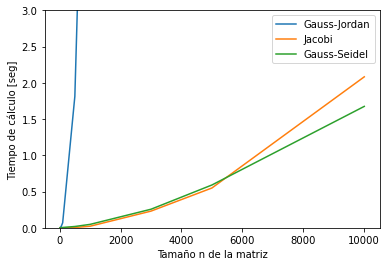

In [179]:
plt.figure()                           # Expresión inicial de toda gráf
plt.plot(evaluacion, tiempos[0], label='Gauss-Jordan')
plt.plot(evaluacion, tiempos[1], label='Jacobi')
plt.plot(evaluacion, tiempos[2], label='Gauss-Seidel')
plt.xlabel('Tamaño n de la matriz')    # Título del eje x.
plt.ylabel('Tiempo de cálculo [seg]')  # Título del eje y.
plt.ylim(0, 3)
plt.legend()                           # Mostrar leyendas.
plt.show()                             # Imprime la gráfica.

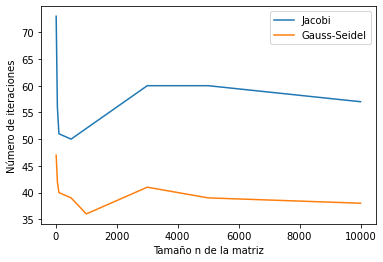

In [180]:
plt.figure()                           # Expresión inicial de toda gráf
plt.plot(evaluacion, pasos_ja, label='Jacobi')
plt.plot(evaluacion, pasos_gs, label='Gauss-Seidel')
plt.xlabel('Tamaño n de la matriz')    # Título del eje x.
plt.ylabel('Número de iteraciones')    # Título del eje y.
plt.legend()                           # Mostrar leyendas.
plt.show()